In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

In [6]:
wine_data = pd.read_csv('datasets/winequality-white.csv',
                          names= ['Fixed Acidity',
                                 'Volatile Acidity',
                                 'Citric Acid',
                                 'Residual Suger',
                                 'Chlorides',
                                 'Free Sulfur Dioxide',
                                 'Total Sulfur Dioxide',
                                 'Dentisty',
                                 'pH',
                                 'Sulphates',
                                 'Alchohol',
                                 'Quality'],
                          skiprows=1,
                          sep=r'\s*;\s*', engine='python')

wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Suger,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Dentisty,pH,Sulphates,Alchohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
wine_data['Quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [9]:
from sklearn import preprocessing

X = wine_data.drop('Quality', axis=1)
y = wine_data['Quality']

X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [10]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty='l1',dual=False, tol=1e-3)
clf_svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)

In [11]:
accuracy = clf_svc.score(X_test, y_test)
print(accuracy)

0.49183673469387756


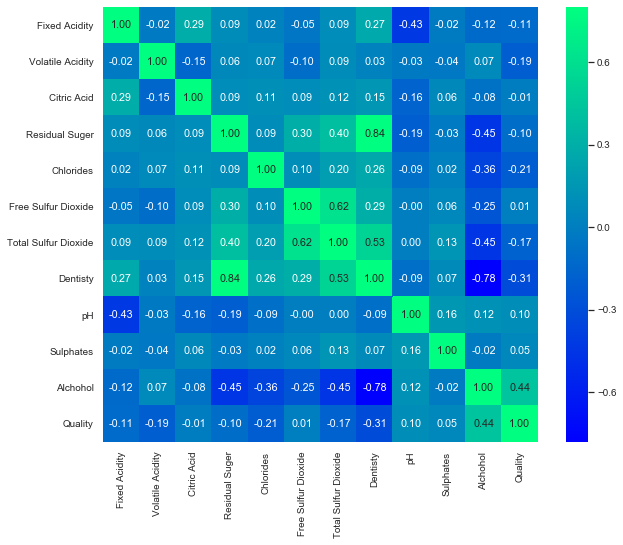

In [20]:
corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=0.9)
sns.heatmap(corrmat, vmax=.8, square=True, fmt='.2f',annot=True, cmap= "winter")
plt.show();

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6, whiten=True)
X_reduced = pca.fit_transform(X)

In [51]:
pca.explained_variance_

array([3.2229119 , 1.57556161, 1.22192081, 1.01873034, 0.97353334,
       0.93893321])

In [52]:
pca.explained_variance_ratio_

array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496,
       0.08534014])

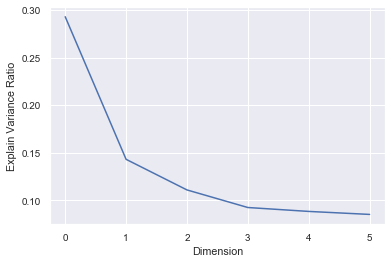

In [53]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explain Variance Ratio')
plt.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state=0)
clf_svc_pca = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)

In [55]:
accuracy = clf_svc_pca.score(X_test, y_test)
print(accuracy)

0.45714285714285713
